In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

### Q-1

Pedestrain fatalities was the main topic discussed in this paper. These were discussed from Kansas. The paper states that male pedestrains were killed more in the crashes than female pedestrains. Most of the pedestrains were also above 65 in their age. The reason being: poor vision, unknown speed limits, health conditions, etc.,  Most of the crashes were occurred due to the increase in the vehicles on the road.

###  Q-2

(a) Most crashes were occurred in the midnight around 6PM to 6AM.

(b) In the day time, the crashes were very less. But in the midnight, the crashes were more.

(c) We cannot say that the poor atmospheric conditions will impact the pedestrain fatalities due to crashes, because most of the crashes had occurred when the weather was clearer according to the given figure-11.

(d) This can be explained because of the rural roads of Kansas which leads to more crashes.

(e) My suggestion is that breakers have to be fitted.

In [2]:
dataframe= pd.DataFrame()
for i in range(1975, 2021, 5):
    dataframe1= pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1',low_memory=False)
    dataframe2= pd.read_csv(f"person_all_years/{i}_PERSONE.csv", encoding = 'ISO-8859-1',low_memory=False)
    dataframe2.drop(["HARM_EV"],inplace=True,axis=1)
    dataframe3 = pd.read_csv(f"vehicle_all_years/{i}_vehicle.csv", encoding = 'ISO-8859-1',low_memory=False)
    dataframe3.drop(["HARM_EV"],inplace=True,axis=1)
    dataframe4 = pd.merge(dataframe1, dataframe2, on='ST_CASE',how="inner").reset_index(drop=True)
    dataframe= pd.merge(dataframe4, dataframe3, on="ST_CASE",how="inner").reset_index(drop=True)
dataframe= dataframe[dataframe["STATENAME_x"] != "KANAS"]
dataframe= dataframe[["AGE", "FATALS", "HARM_EV", "VSPD_LIM", "HOURNAME", "HOUR", "YEAR"]]
dataframe= dataframe[dataframe["HARM_EV"]==8]

In [3]:
dataframe["VSPD_LIM"].mask(dataframe["VSPD_LIM"]>=60, "60 mph or higher", inplace=True)
speeds= [35, 40, 45, 50, 55]
strings= ['35 or 40 mph', '35 or 40 mph', '45 or 50 mph', '45 or 50 mph', '55 mph']
for i in range(len(speeds)):
    dataframe["VSPD_LIM"].mask(dataframe["VSPD_LIM"]==speeds[i], strings[i], inplace=True)
speeds= [0, 5, 10, 15, 20, 25, 30]
for i in speeds:
    dataframe["VSPD_LIM"].mask(dataframe["VSPD_LIM"]==i, "30 mph or less", inplace=True)
dataframe_t= dataframe.groupby(by= "VSPD_LIM").sum("FATALS")
strings= ["30 mph or less", "35 or 40 mph", "45 or 50 mph", "55 mph", "60 mph or higher"]
died= dataframe_t["FATALS"].sum()
died_percentage= []
for i in range(len(strings)):
    died_percentage.append(dataframe_t["FATALS"][i]/died*100)

## Task: Recreate the graph in Figure 15.

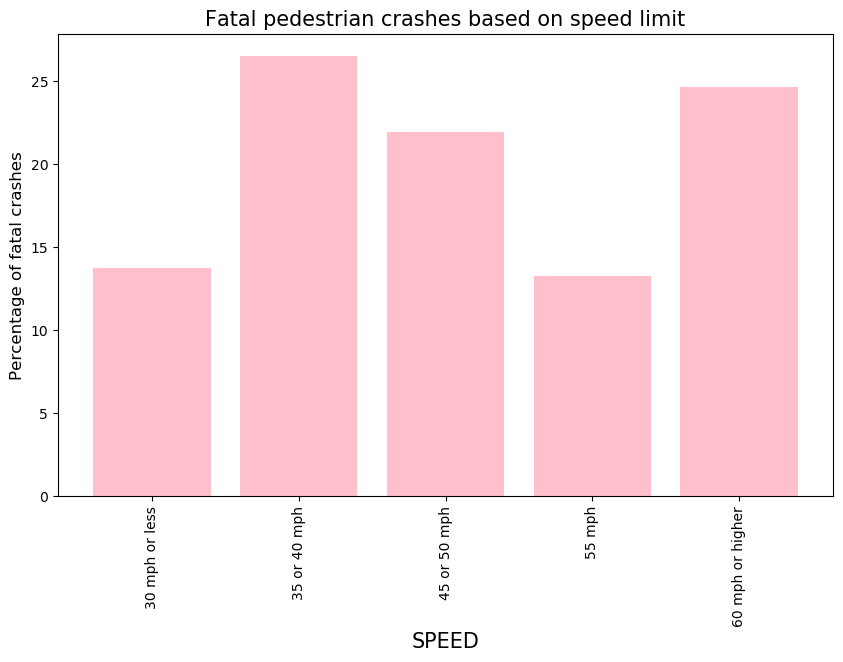

In [4]:
plt.figure(figsize=(10,6))
plt.bar(x= strings, height= died_percentage, color="pink")
plt.xticks(rotation=90)
plt.xlabel("SPEED",fontsize=15)
plt.ylabel("Percentage of fatal crashes",fontsize=12)
plt.title("Fatal pedestrian crashes based on speed limit",fontsize=15)
plt.show()

##  Task: Recreate Figure 4 and Figure 9.

### Figure - 4

In [5]:
years= []
for year in dataframe["AGE"]:
    string= ''
    if year < 16:
        string = "<16"
    elif year >= 16 and year <= 24:
        string = "16-24"
    elif year >= 25 and year <= 34:
        string = "25-34"
    elif year >= 35 and year <= 44:
        string = "35-44"
    elif year >= 45 and year <= 54:
        string = "45-54"
    elif year >= 55 and year <= 64:
        string = "55-64"
    else:
        string = "65+"
    years.append(string)
dataframe["YEARS"] = years
dataframe_t = dataframe.groupby(by="YEARS").sum()

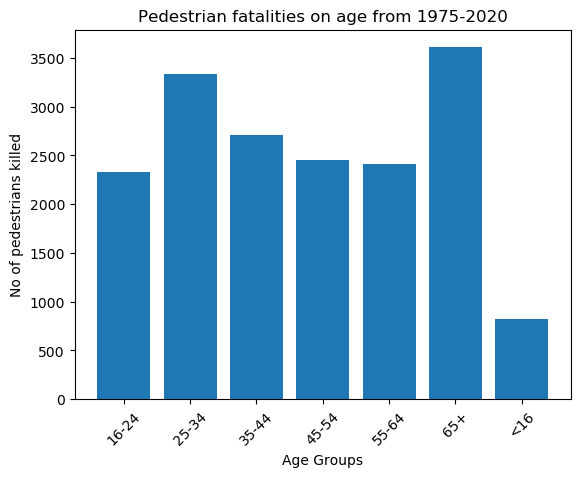

In [6]:
plt.bar(x= dataframe_t.index, height= dataframe_t["FATALS"])
plt.xticks(rotation= 45)
plt.xlabel("Age Groups")
plt.ylabel("No of pedestrians killed")
plt.title("Pedestrian fatalities on age from 1975-2020")
plt.show()

### Figure - 9

In [7]:
timings= []
for time in dataframe["HOUR"]:
    string= ''
    if time >= 0 and time <= 5:
        string= "Midnight to 5:59 am"
    elif time >= 6 and time <= 8:
        string= "6 am to 8:59 am"
    elif time >= 9 and time <= 14:
        string= "9 am to 2:59 pm"
    elif time >= 15 and time <= 17:
        string= "3 pm to 5:59 pm"
    elif time >= 18 and time <= 20:
        string= "6pm to 8:59 pm"
    else:
        string= "9 pm to 11:59 pm"
    timings.append(string)
dataframe["TIMINGS"]= timings
dataframe_t= dataframe.groupby(by="TIMINGS").sum()

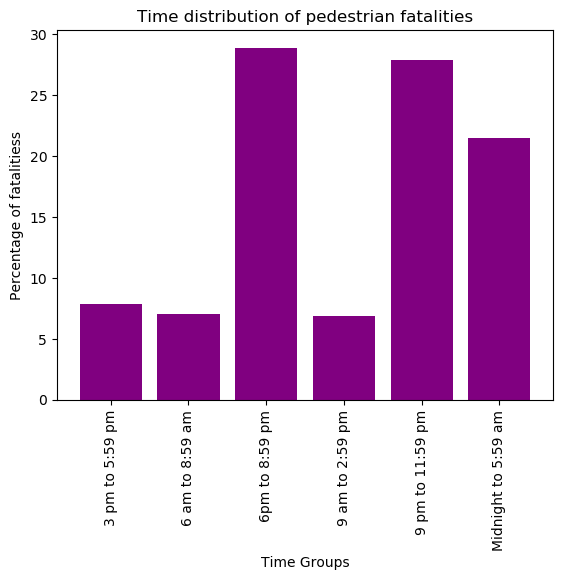

In [8]:
plt.bar(x=dataframe_t.index, height=dataframe_t["FATALS"]/dataframe_t["FATALS"].sum()*100,color='purple')
plt.xticks(rotation=90)
plt.xlabel("Time Groups")
plt.ylabel("Percentage of fatalitiess")
plt.title("Time distribution of pedestrian fatalities")
plt.show()

## Task: Take the data from Figure 4 and Figure 9 and combine them. What you will end up with is a grouping by age band, then by time of day. Your final graph will be able to answer questions about which age group is more or less likely to experience a pedestrian fatality during which time of day.

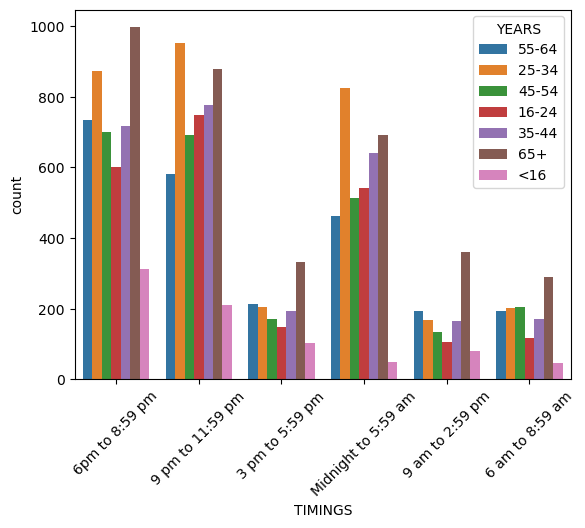

In [9]:
sns.countplot(x= "TIMINGS", hue="YEARS",data=dataframe)
plt.xticks(rotation=45)
plt.show()

## Task: (Reshape the US dataset from HW1)

In [10]:
dataframe_us= pd.DataFrame()
for i in range(1975, 2021, 5):
    dataframe_us1= pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1')
    dataframe_us= pd.concat([dataframe_us, dataframe_us1]).reset_index(drop=True)

dataframe_us= dataframe_us.loc[:, ["STATE","STATENAME" ,'MONTH', 'DAY', 'HOUR', 'PERSONS', 'MAN_COLL', 'LGT_COND', 'WEATHER', 
                                'SCH_BUS', 'FATALS', 'DAY_WEEK', 'DRUNK_DR',"HARM_EV"]]
dataframe_us= dataframe_us[dataframe_us["STATENAME"]!="Kansas"]
dataframe_us.drop("STATENAME",inplace=True,axis=1)
dataframe_us=dataframe_us[dataframe_us["HARM_EV"]==8]
dataframe_us.dropna(inplace=True)
dataframe_us=dataframe_us.sample(n=5000)

## Task: (Perform ad hoc K-Means clustering)

In [11]:
dataframe_us_scaled=StandardScaler().fit_transform(dataframe_us)

In [12]:
num_of_clusters= [5,10,12]
for num in num_of_clusters:
    model= KMeans(n_clusters= num, init='k-means++')
    model.fit(dataframe_us_scaled)
    print("Centroids of the cluster are \n{}\n".format(model.cluster_centers_))

Centroids of the cluster are 
[[ 6.64576951e-03 -4.97496255e-02 -4.29705974e-03 -7.65945866e-02
   3.01711004e-01  0.00000000e+00  1.92056575e-01 -1.19859576e-01
  -7.36839081e-02  1.19498680e-01  3.66916129e-02  2.21375732e+00
   0.00000000e+00]
 [ 1.16452693e-01 -2.20634577e-01 -2.55821295e-01 -2.51419091e-01
  -2.92316507e-01  0.00000000e+00 -8.99865715e-01 -1.30259947e-01
   1.35714843e+01 -1.07685123e-01 -2.66488657e-01 -3.25390964e-01
   0.00000000e+00]
 [-3.82850145e-02 -9.30556518e-01 -9.89913969e-02 -2.08186075e-03
  -1.27028070e-01  0.00000000e+00 -1.13092111e-01 -8.11016311e-02
  -7.36839081e-02 -6.95241692e-02  2.59791958e-02 -4.16577761e-01
   0.00000000e+00]
 [-2.91844142e-01  2.81970435e-02 -1.30834682e-01  7.47431190e-01
  -5.85013196e-01  0.00000000e+00  2.11712585e+00  1.07372819e+01
  -7.36839081e-02 -1.07685123e-01 -5.10389034e-02 -3.56527919e-01
   0.00000000e+00]
 [ 3.48203774e-02  8.27093778e-01  9.29330576e-02  1.83313166e-02
   1.71002705e-02  0.00000000e+00  1

## Task: (Perform elbow analysis to find optimal cluster size)

In [18]:
max_num_of_clusters = 15
lst= []
for c in range(1, max_num_of_clusters):
    model= KMeans(n_clusters= c, init= 'k-means++', max_iter= 200, n_init= 10, random_state=1)
    model.fit(dataframe_us_scaled)
    lst.append(model.inertia_)

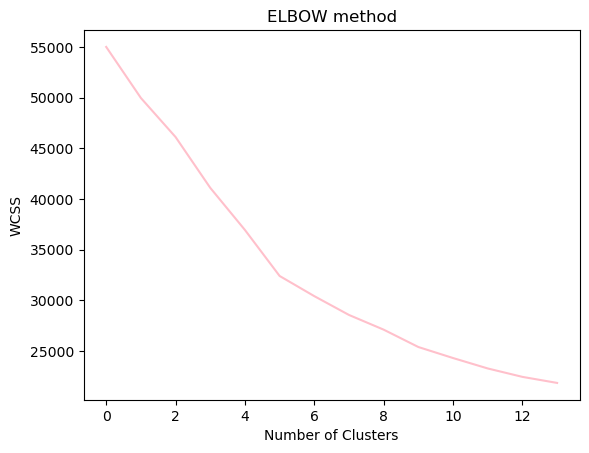

In [19]:
plt.plot(lst, color= 'pink')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("ELBOW method")
plt.show()

The optimal cluster size is 5

## Task: (Find out where Kansas fits in)

In [20]:
model= KMeans(n_clusters= 5, init='k-means++')
model.fit(dataframe_us_scaled)
label= model.predict(dataframe_us_scaled)

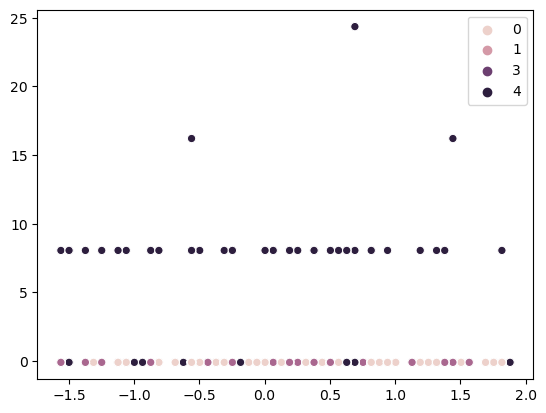

In [21]:
x=[]
y=[]
for i in range(len(dataframe_us_scaled)):
    y.append(dataframe_us_scaled[i][9])
    x.append(dataframe_us_scaled[i][0])

sns.scatterplot(x,y,hue=label)

Kansas fits well in 0 and 5 according to the above graph

## Task: (Perform Agglomorative Clustering)

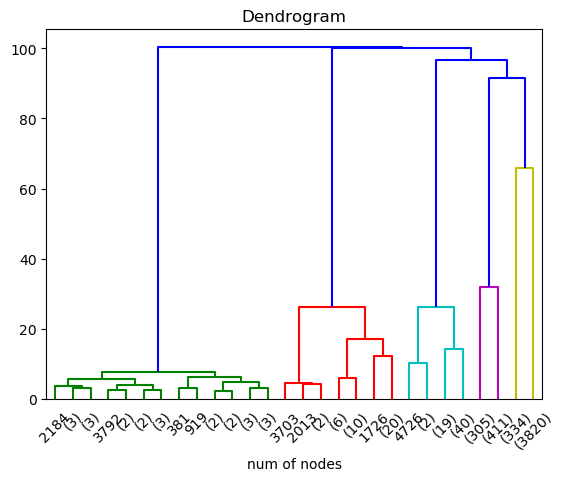

In [17]:
def plot(clf, **args):
    counts= np.zeros(clf.children_.shape[0])
    num_of_samples= len(clf.labels_)
    for i, j in enumerate(clf.children_):
        curr_c = 0
        for idx in j:
            curr_c += 1 if idx<num_of_samples else counts[idx-num_of_samples]
        counts[i]= curr_c
    linkmat= np.column_stack([clf.children_, clf.distances_, counts]).astype(float)
    dendrogram(linkmat, **args)

clf= AgglomerativeClustering(distance_threshold=0, n_clusters=None)
clf= clf.fit(dataframe_us_scaled)
plot(clf, truncate_mode="level", p=4)
plt.title("Dendrogram")
plt.xlabel("num of nodes")
plt.show()